In [ ]:
!pip install -U -q PyDrive
  
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
  
  
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing CSV files

In [ ]:
link = 'https://drive.google.com/file/d/1ufRUg6Ei3CMdua-Xwenzxcmc1yeQgsV4/view?usp=sharing'
  
import pandas as pd
  
# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('calender.csv')  
  
df_cal = pd.read_csv('calender.csv')


In [ ]:
df_cal.head(10)

In [ ]:
link2 = 'https://drive.google.com/file/d/1m6nruWs1iaFwbgvsiKTJVplUQ5qv4I3X/view?usp=sharing'
  
import pandas as pd
  
# to get the id part of the file
id = link2.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('client.csv')  
  
df_client = pd.read_csv('client.csv') 


In [ ]:
df_client.describe()

,client_id,client_age
count,4.634700e+04,46347.000000
mean,4.986204e+14,52.952295
std,2.898636e+14,14.239292
min,1.460463e+11,21.000000
25%,2.470750e+14,42.000000
50%,4.998895e+14,53.000000
75%,7.497884e+14,63.000000
max,9.999856e+14,105.000000


In [ ]:
df_client.isnull().sum().sum()

0

In [ ]:
df_client.head(10)

In [ ]:
link3 = 'https://drive.google.com/file/d/1lCfLxxCp2zAn3AOJqkm5i23RVM9qzexm/view?usp=sharing'
  
import pandas as pd
  
# to get the id part of the file
id = link3.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('deposit.csv')  
  
df_deposit = pd.read_csv('deposit.csv')


In [ ]:
df_deposit.isnull().sum().sum()

0

In [ ]:
df_deposit.describe()

,client_id,deposit_amount
count,4.803940e+05,480394.000000
mean,4.992809e+14,365.207130
std,2.899833e+14,346.644434
min,1.460463e+11,0.010000
25%,2.477689e+14,200.000000
50%,5.015297e+14,290.000000
75%,7.503108e+14,452.000000
max,9.999856e+14,30000.000000


# Deposit Table Analysis

In [ ]:
df_deposit.head(5)

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23
3,446495122764671,Scheduled Deposit,303.0,Monthly,2019-10-23
4,446495122764671,Scheduled Deposit,303.0,Monthly,2019-06-23


In [ ]:
df_deposit['client_id'].nunique()

In [ ]:
df_deposit = df_deposit.sort_values(['deposit_date','client_id','deposit_type','deposit_amount','deposit_cadence'])

In [ ]:
df_deposit.head(5)

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date
331388,240341276372,Actual Deposit,440.0,Biweekly,2019-06-01
331387,240341276372,Scheduled Deposit,440.0,Biweekly,2019-06-01
329661,372629984816,Actual Deposit,496.0,Biweekly,2019-06-01
329660,372629984816,Scheduled Deposit,496.0,Biweekly,2019-06-01
330878,871884224231,Actual Deposit,334.0,Monthly,2019-06-01


In [ ]:
df_deposit = df_deposit.rename(columns={'deposit_date':'date'})
df_cal = df_cal.rename(columns={'gregorian_date':'date'})

## Merging deposit table with calender table 

In [ ]:
df_dep = pd.merge(df_deposit, df_cal, on='date', how='inner')

In [ ]:
df_dep.head(10)

,client_id,deposit_type,deposit_amount,deposit_cadence,date,month_name
0,240341276372,Actual Deposit,440.0,Biweekly,2019-06-01,Month 1
1,240341276372,Scheduled Deposit,440.0,Biweekly,2019-06-01,Month 1
2,372629984816,Actual Deposit,496.0,Biweekly,2019-06-01,Month 1
3,372629984816,Scheduled Deposit,496.0,Biweekly,2019-06-01,Month 1
4,871884224231,Actual Deposit,334.0,Monthly,2019-06-01,Month 1
5,871884224231,Scheduled Deposit,334.0,Monthly,2019-06-01,Month 1
6,1563291329269,Actual Deposit,235.0,Biweekly,2019-06-01,Month 1
7,1563291329269,Scheduled Deposit,235.0,Biweekly,2019-06-01,Month 1
8,1923587859300,Actual Deposit,20.0,Monthly,2019-06-01,Month 1
9,1923587859300,Scheduled Deposit,20.0,Monthly,2019-06-01,Month 1


In [ ]:
df_cal.dtypes

date          object
month_name    object
dtype: object

In [ ]:
df_deposit.dtypes

client_id            int64
deposit_type        object
deposit_amount     float64
deposit_cadence     object
date                object
dtype: object

In [ ]:
df_dep['month_name'].unique()

### Splitting the deposit table - before campaign, after campaign, campaign period

In [ ]:
option1 = ['Month 1','Month 2']
b_campaign = df_dep.loc[df_dep['month_name'].isin(option1)]

In [ ]:
b_campaign

In [ ]:
option2 = ['Month 4','Month 5']
a_campaign = df_dep.loc[df_dep['month_name'].isin(option2)]

In [ ]:
a_campaign

In [ ]:
campaign = df_dep.loc[df_dep['month_name']== 'Month 3']

In [ ]:
campaign

In [ ]:
b_clients = b_campaign['client_id'].nunique()
c_clients = campaign['client_id'].nunique()
a_clients = a_campaign['client_id'].nunique()

In [ ]:
df_dep.head(10)

,client_id,deposit_type,deposit_amount,deposit_cadence,date,month_name
0,240341276372,Actual Deposit,440.0,Biweekly,2019-06-01,Month 1
1,240341276372,Scheduled Deposit,440.0,Biweekly,2019-06-01,Month 1
2,372629984816,Actual Deposit,496.0,Biweekly,2019-06-01,Month 1
3,372629984816,Scheduled Deposit,496.0,Biweekly,2019-06-01,Month 1
4,871884224231,Actual Deposit,334.0,Monthly,2019-06-01,Month 1
5,871884224231,Scheduled Deposit,334.0,Monthly,2019-06-01,Month 1
6,1563291329269,Actual Deposit,235.0,Biweekly,2019-06-01,Month 1
7,1563291329269,Scheduled Deposit,235.0,Biweekly,2019-06-01,Month 1
8,1923587859300,Actual Deposit,20.0,Monthly,2019-06-01,Month 1
9,1923587859300,Scheduled Deposit,20.0,Monthly,2019-06-01,Month 1


### Splitting table - for month wise analysis

In [ ]:
month1 = df_dep.where(df_dep['month_name'] == 'Month 1')
month2 = df_dep.where(df_dep['month_name'] == 'Month 2')
month3 = df_dep.where(df_dep['month_name'] == 'Month 3')
month4 = df_dep.where(df_dep['month_name'] == 'Month 4')
month5 = df_dep.where(df_dep['month_name'] == 'Month 5')


In [ ]:
m1 = month1['client_id'].nunique()
m2 = month2['client_id'].nunique()
m3 = month3['client_id'].nunique()
m4 = month4['client_id'].nunique()
m5 = month5['client_id'].nunique()

In [ ]:
# Number of clients 
data = {'Month': ['m1','m2','m3','m4','m5'], 
        'No_of_clients': [m1,m2,m3,m4,m5]}
df = pd.DataFrame(data)
df

,Month,No_of_clients
0,m1,32140
1,m2,32757
2,m3,43806
3,m4,40840
4,m5,40718


In [ ]:
ax = df.plot(kind='bar', x='Month', title='No_of_clients in each month', rot=360, figsize=(11,6), color=['red'])



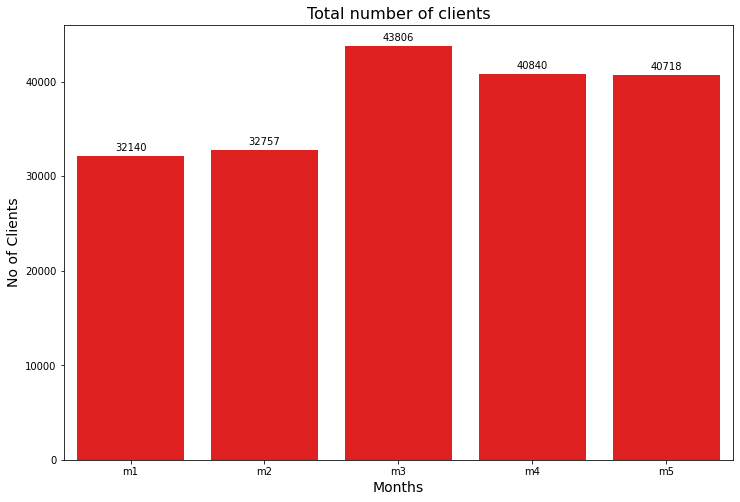

In [ ]:
plt.figure(figsize=(12,8))
plots =sns.barplot(x='Month',y='No_of_clients',data=data, color='red')

for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Months", size=14)
plt.ylabel("No of Clients", size=14)
plt.title("Total number of clients", size=16)
plt.show()

for val in df['Month']:
  if val == 'm1' or val == 'm2':
    bar.set_color('red')
  else:
    bar.set_color('black')


In [ ]:
print('The number of new clients during the campaign month is:    ', c_clients-b_clients)
print('The number new clients joined after the campaign:  ', a_clients-b_clients)

The number of new clients during the campaign month is:     9755
The number new clients joined after the campaign:   7811


In [ ]:
#Total deposit collected and charges collected

d_m1 = month1['deposit_amount'].sum()/1000000
d_m2 = month2['deposit_amount'].sum()/1000000
d_m3 = month3['deposit_amount'].sum()/1000000
d_m4 = month4['deposit_amount'].sum()/1000000
d_m5 = month5['deposit_amount'].sum()/1000000

In [ ]:
chg_m1 = (d_m1*0.20)
chg_m2 = (d_m2*0.20)
chg_m3 = (d_m3*0.20)
chg_m4 = (d_m4*0.20)
chg_m5 = (d_m5*0.20)


In [ ]:
data1 = {'Month': ['m1','m2','m3','m4','m5'], 'chg_collected (in millions)': [chg_m1, chg_m2, chg_m3, chg_m4, chg_m5],
        'Total_deposit (in millions)': [d_m1, d_m2, d_m3, d_m4, d_m5]
         }
df1 = pd.DataFrame(data1)
df1

,Month,chg_collected (in millions),Total_deposit (in millions)
0,m1,5.856966,29.284831
1,m2,5.977286,29.886431
2,m3,7.935011,39.675057
3,m4,7.703164,38.515820
4,m5,7.616235,38.081175


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

<Figure size 864x576 with 0 Axes>

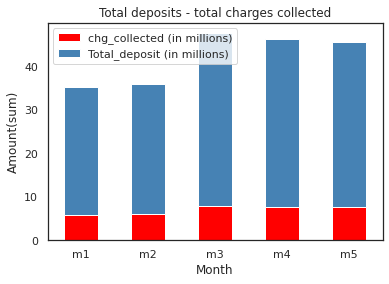

In [ ]:
plt.figure(figsize=(12,8))
sns.set(style='white')
stacked_bar = df1.set_index('Month').plot(kind='bar', stacked='True', color = ['red','steelblue'])
plt.title('Total deposits - total charges collected')
plt.xlabel('Month')
plt.ylabel('Amount(sum)')
plt.xticks(rotation=0)

In [ ]:
plt.figure(figsize=(12,8))
plots =sns.barplot(x='Month',y='Total_deposit',data=data1, color='steelblue')

for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height()/1000000, '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Months", size=14)
plt.ylabel("Total sum of Deposits", size=14)
plt.title("Total deposits collected in each month (in Millions)", size=16)
plt.show()



In [ ]:
data1 = {'Month': ['m1','m2','m3','m4','m5'], 'chg_collected': [chg_m1, chg_m2, chg_m3, chg_m4, chg_m5],
         }
df1 = pd.DataFrame(data1)
df1

,Month,chg_collected
0,m1,5.856966
1,m2,5.977286
2,m3,7.935011
3,m4,7.703164
4,m5,7.616235


In [ ]:
plt.figure(figsize=(12,8))
plots =sns.barplot(x='Month',y='chg_collected',data=df1, color='red')

for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height()/1000000, '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Months", size=14)
plt.ylabel("Total sum of Deposits", size=14)
plt.title("Total deposits collected in each month (in Millions)", size=16)
plt.show()


In [ ]:
month1 = df_dep.where(df_dep['month_name'] == 'Month 1').dropna()
month2 = df_dep.where(df_dep['month_name'] == 'Month 2').dropna()
month3 = df_dep.where(df_dep['month_name'] == 'Month 3').dropna()
month4 = df_dep.where(df_dep['month_name'] == 'Month 4').dropna()
month5 = df_dep.where(df_dep['month_name'] == 'Month 5').dropna()

In [ ]:
month1.head(5)

### Deposit type Analysis

In [ ]:
s1 = month1.where(month1['deposit_type'] == 'Scheduled Deposit').dropna()
s2 = month2.where(month2['deposit_type'] == 'Scheduled Deposit').dropna()
s3 = month3.where(month3['deposit_type'] == 'Scheduled Deposit').dropna()
s4 = month4.where(month4['deposit_type'] == 'Scheduled Deposit').dropna()
s5 = month5.where(month5['deposit_type'] == 'Scheduled Deposit').dropna()

s1_sum = s1['deposit_amount'].sum()
s2_sum = s2['deposit_amount'].sum()
s3_sum = s3['deposit_amount'].sum()
s4_sum = s4['deposit_amount'].sum()
s5_sum = s5['deposit_amount'].sum()

a1 = month1.where(month1['deposit_type'] == 'Actual Deposit').dropna()
a2 = month2.where(month2['deposit_type'] == 'Actual Deposit').dropna()
a3 = month3.where(month3['deposit_type'] == 'Actual Deposit').dropna()
a4 = month4.where(month4['deposit_type'] == 'Actual Deposit').dropna()
a5 = month5.where(month5['deposit_type'] == 'Actual Deposit').dropna()

a1_sum = a1['deposit_amount'].sum()
a2_sum = a2['deposit_amount'].sum()
a3_sum = a3['deposit_amount'].sum()
a4_sum = a4['deposit_amount'].sum()
a5_sum = a5['deposit_amount'].sum()


In [ ]:
df_dep.head(5)

In [ ]:
act_dep = df_dep.where(df_dep['deposit_type'] == 'Actual Deposit').dropna()
act_dep.head(5)

In [ ]:
q = """select client_id, sum(deposit_amount) as dep_amt 
       from act_dep
       group by client_id
"""

ad = pysqldf(q)
ad

In [ ]:
np.mean(ad['dep_amt'])

1977.9734560411798

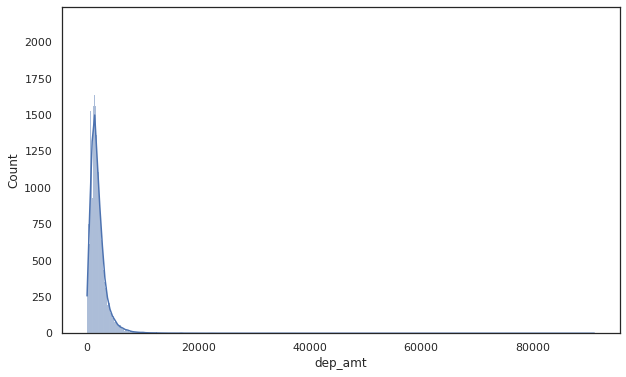

In [ ]:
sns.histplot(ad['dep_amt'], kde = 'TRUE')

In [ ]:
a1.head(5)

In [ ]:
q = """Select client_id, sum(deposit_amount) as dep_amt 
        from a1
        where client_id not in (select client_id from a2)
        group by client_id
        UNION 
        Select client_id, sum(deposit_amount) as dep_amt 
        from a2
        where client_id not in (select client_id from a3)
        group by client_id
        UNION 
        Select client_id, sum(deposit_amount) as dep_amt 
        from a3
        where client_id not in (select client_id from a4)
        group by client_id
        UNION 
        Select client_id, sum(deposit_amount) as dep_amt 
        from a4
        where client_id not in (select client_id from a5)
        group by client_id"""

actual_deposit_settled = pysqldf(q)
actual_deposit_settled

In [ ]:
np.mean(actual_deposit_settled['dep_amt']) 

515.4688783766961

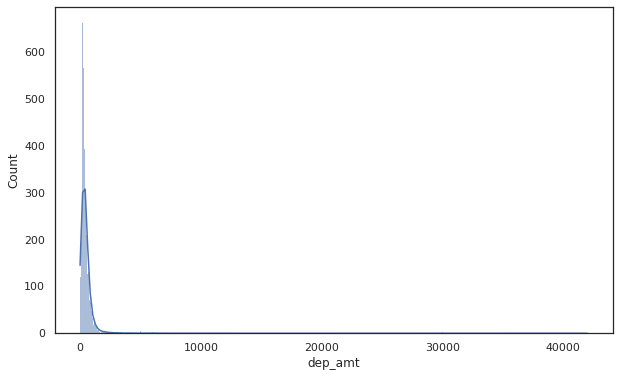

In [ ]:
sns.histplot(actual_deposit_settled['dep_amt'], kde="TRUE")

In [ ]:
d_grouped = df_dep.groupby(['month_name','deposit_type'])['deposit_amount'].agg(['sum', 'count'])
d_grouped['sum']

month_name  deposit_type     
Month 1     Actual Deposit       14290184.25
            Scheduled Deposit    14994646.61
Month 2     Actual Deposit       14653623.58
            Scheduled Deposit    15232807.69
Month 3     Actual Deposit       19524393.05
            Scheduled Deposit    20150664.05
Month 4     Actual Deposit       18951569.18
            Scheduled Deposit    19564250.55
Month 5     Actual Deposit       18657678.80
            Scheduled Deposit    19423496.43
Name: sum, dtype: float64

In [ ]:
dep_sum = df_dep.groupby(['month_name','deposit_type'])['deposit_amount'].sum()
dep_sum = pd.DataFrame(dep_sum)


In [ ]:
data2 = {'Month': ['m1','m2','m3','m4','m5'], 
        'Scheduled Deposit': [s1_sum,s2_sum,s3_sum,s4_sum,s5_sum],
         'Actual Deposit': [a1_sum,a2_sum,a3_sum,a4_sum,a5_sum],
         }
df2 = pd.DataFrame(data2)
df2

,Month,Scheduled Deposit,Actual Deposit
0,m1,14994646.61,14290184.25
1,m2,15232807.69,14653623.58
2,m3,20150664.05,19524393.05
3,m4,19564250.55,18951569.18
4,m5,19423496.43,18657678.80


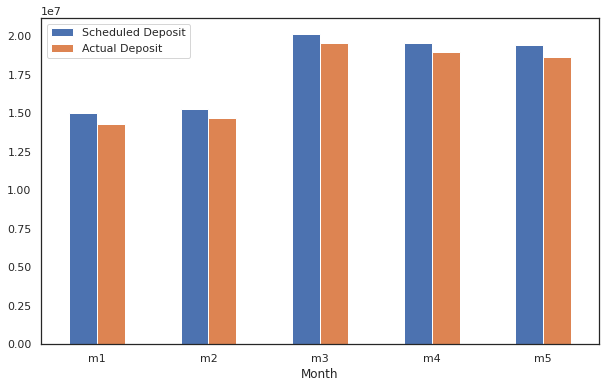

In [ ]:
plt.rcParams['figure.figsize'] = [10,6]
dep_sum = df2.plot(x="Month", y=["Scheduled Deposit", "Actual Deposit"], kind="bar", rot=0)


In [ ]:
b_campaign.head(5)

,client_id,deposit_type,deposit_amount,deposit_cadence,date,month_name
0,240341276372,Actual Deposit,440.0,Biweekly,2019-06-01,Month 1
1,240341276372,Scheduled Deposit,440.0,Biweekly,2019-06-01,Month 1
2,372629984816,Actual Deposit,496.0,Biweekly,2019-06-01,Month 1
3,372629984816,Scheduled Deposit,496.0,Biweekly,2019-06-01,Month 1
4,871884224231,Actual Deposit,334.0,Monthly,2019-06-01,Month 1


## Incorporating SQL in Python

In [ ]:
!pip install pandasql

In [ ]:
from pandasql import sqldf

In [ ]:
pysqldf = lambda q: sqldf(q, globals())

In [ ]:
test = {'a': [2,3,4], 
        'b': [2,3,6]}

test1 = {'c':[2,3,4], 
        'b': [2,3,6]}
d = pd.DataFrame(test)
d1 = pd.DataFrame(test1)
d1
d

,a,b
0,2,2
1,3,3
2,4,6


In [ ]:
month4.dropna()

In [ ]:
q = """Select count(*) 
        from month1
        where client_id not in (select client_id from month2)"""

settled1 = pysqldf(q)
settled1 = settled1['count(*)'][0]
settled1

0

In [ ]:
q = """Select count(*) 
        from month2
        where client_id not in (select client_id from month3)"""

settled2 = pysqldf(q)
settled2 = settled2['count(*)'][0]
settled2

0

In [ ]:
q = """Select count(*) 
        from month3
        where client_id not in (select client_id from month4)"""

settled3 = pysqldf(q)
settled3 = settled3['count(*)'][0]
settled3


7746

In [ ]:
q = """Select count(*) 
        from month4
        where client_id not in (select client_id from month5)"""

settled4 = pysqldf(q)
settled4 = settled4['count(*)'][0]
settled4

2643

In [ ]:
q = """Select count(*) 
        from month2
        where client_id not in (select client_id from month1)"""

addn1 = pysqldf(q)
addn1 = addn1['count(*)'][0]
addn1

4174

In [ ]:
q = """Select count(*) 
        from month3
        where client_id not in (select client_id from month2)"""

addn2 = pysqldf(q)
addn2 = addn2['count(*)'][0]
addn2

28667

In [ ]:
q = """Select count(*) 
        from month4
        where client_id not in (select client_id from month3)"""

addn3 = pysqldf(q)
addn3 = addn3['count(*)'][0]
addn3

1474

In [ ]:
q = """Select count(*)
        from month5
        where client_id not in (select client_id from month4)"""

addn4 = pysqldf(q)
addn4 = addn4['count(*)'][0]
addn4

1938

In [ ]:
# Membership fee collected from additional members in the campaign
q = """select client_id, count(client_id)*10 as mem_fee
      from 
        (Select distinct client_id
        from month3
        where client_id not in (select client_id from month2) and client_id not in (select client_id from month1) 
        UNION ALL
        Select distinct client_id 
        from month4
        where client_id not in (select client_id from month2) and client_id not in (select client_id from month1)
        UNION ALL
        Select distinct client_id 
        from month5
        where client_id not in (select client_id from month2) and client_id not in (select client_id from month1)) t1
      group by client_id
        """

campaign_addn = pysqldf(q)
ca = campaign_addn['mem_fee'].sum()
ca

328650

In [ ]:
cust_anal = {'Month': ['m2','m3','m4','m5'],
              'Settled_accounts': [settled1, settled2, settled3, settled4],
             'New customers': [addn1, addn2, addn3, addn4]}

d_cust_anal = pd.DataFrame(cust_anal)
d_cust_anal

,Month,Settled_accounts,New customers
0,m2,2376,4174
1,m3,1251,28667
2,m4,7746,1474
3,m5,2643,1938


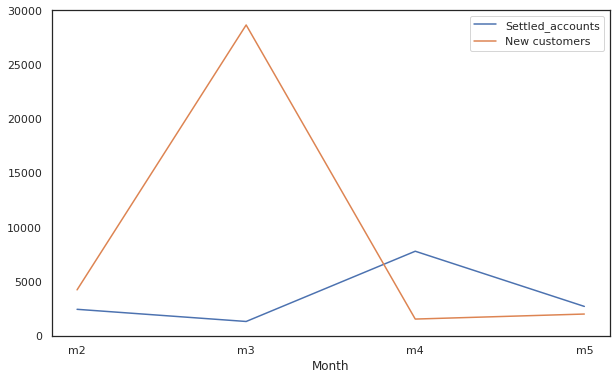

In [ ]:
ax = plt.gca()
  
#use plot() method on the dataframe
d_cust_anal.plot( x = 'Month' , y = 'Settled_accounts', ax = ax )
d_cust_anal.plot( x = 'Month' , y = 'New customers' , ax = ax )

In [ ]:
q = """Select deposit_type, sum(deposit_amount) as sum
        from month2
        where client_id not in (select client_id from month3)
        group by deposit_type"""

churn1_cust_anal = pysqldf(q)
churn1_cust_anal

,deposit_type,sum
0,Actual Deposit,342638.85
1,Scheduled Deposit,198214.00


In [ ]:
q = """Select deposit_type, sum(deposit_amount) as sum
        from month2
        where client_id not in (select client_id from month3)
        group by deposit_type"""

churn2_cust_anal = pysqldf(q)
churn2_cust_anal

,deposit_type,sum
0,Actual Deposit,342638.85
1,Scheduled Deposit,198214.00


In [ ]:
q = """Select deposit_type, sum(deposit_amount) as sum
        from month3
        where client_id not in (select client_id from month4)
        group by deposit_type"""

churn3_cust_anal = pysqldf(q)
churn3_cust_anal

,deposit_type,sum
0,Actual Deposit,1412341.23
1,Scheduled Deposit,1458050.74


In [ ]:
q = """Select deposit_type, sum(deposit_amount) as sum
        from month4
        where client_id not in (select client_id from month5)
        group by deposit_type"""

churn4_cust_anal = pysqldf(q)
churn4_cust_anal

,deposit_type,sum
0,Actual Deposit,522543.51
1,Scheduled Deposit,426549.95


In [ ]:
#churn customers detailed analysis - calc 25% settlement fee 

q = """select c1.deposit_type, c1.sum as m2, c2.sum as m3, c3.sum as m4, c4.sum as m5
        from churn3_cust_anal c3 
        join churn4_cust_anal c4 
        on c3.deposit_type = c4.deposit_type
        join churn1_cust_anal c1
        on c3.deposit_type = c1.deposit_type
        join churn2_cust_anal c2
        on c3.deposit_type = c2.deposit_type"""

c4 = pysqldf(q)
c4

,deposit_type,m2,m3,m4,m5
0,Actual Deposit,342638.85,342638.85,1412341.23,522543.51
1,Scheduled Deposit,198214.00,198214.00,1458050.74,426549.95


In [ ]:
c4 = c4.where(c4['deposit_type'] == 'Actual Deposit').dropna()
chg2 = ((c4['m2']*100)/60)*.20
chg3 = ((c4['m3']*100)/60)*.20
chg4 = ((c4['m4']*100)/60)*.20
chg5 = ((c4['m5']*100)/60)*.20


In [ ]:
print(chg2[0]+chg3[0]+chg4[0]+chg5[0])
print(chg3[0])
print(chg4[0])
print(chg5[0])

873387.48
114212.95000000001
470780.41
174181.16999999998


In [ ]:
cust_anal = {'Month': ['m2','m3','m4','m5'],
              'Settled': [settled1, settled2, settled3, settled4],
             'New customers': [addn1, addn2, addn3, addn4]}

d_cust_anal = pd.DataFrame(cust_anal)
d_cust_anal

,Month,Settled,New customers
0,m2,2376,4174
1,m3,1251,28667
2,m4,7746,1474
3,m5,2643,1938


### Increasing Granularity 

In [ ]:
q = """Select client_id 
        from month1
        where client_id not in (select client_id from month2)"""

settled1_c = pysqldf(q)
settled1_c 

In [ ]:
q = """Select client_id 
        from month2
        where client_id not in (select client_id from month3)"""

settled2_c = pysqldf(q)
settled2_c 

In [ ]:
q = """Select client_id 
        from month3
        where client_id not in (select client_id from month4)"""

settled3_c = pysqldf(q)
settled3_c 

In [ ]:
q = """Select client_id 
        from month4
        where client_id not in (select client_id from month5)"""

settled4_c = pysqldf(q)
settled4_c

In [ ]:
q = """Select client_id 
        from month2
        where client_id not in (select client_id from month1)"""

addn1_c = pysqldf(q)
addn1_c 


In [ ]:
q = """Select client_id 
        from month3
        where client_id not in (select client_id from month2)"""

addn2_c = pysqldf(q)
addn2_c 

In [ ]:
q = """Select client_id 
        from month4
        where client_id not in (select client_id from month3)"""

addn3_c = pysqldf(q)
addn3_c

In [ ]:
q = """Select client_id 
        from month5
        where client_id not in (select client_id from month4)"""

addn4_c = pysqldf(q)
addn4_c

In [ ]:
# per month charge is 10$ 
q = """select cast(client_id as int) as client_id, count(client_id) as term_client, count(client_id)*10 as membership_earnings 
       from
        (select distinct client_id 
        from month1
        UNION ALL
        select distinct client_id 
        from month2
        UNION ALL
        select distinct client_id 
        from month3
        UNION ALL
        select distinct client_id 
        from month4
        UNION ALL
        select distinct client_id 
        from month5) t1
       group by client_id """

client_anal = pysqldf(q)
total_member_earnings = client_anal['membership_earnings'].sum()
client_anal

In [ ]:
print(m1,m2,m3,m4,m5)

32140 32757 43806 40840 40718


In [ ]:
#Membership fee Calcualtion
bc_mem_fee = (m1 + m2) * 10 
ac_mem_fee = (m3+m3+m5) * 10

print('Each month membership fee')
print(m1*10, m2*10, m3*10, m4*10, m5*10)
print(total_member_earnings)
print(bc_mem_fee)
print(ac_mem_fee)

Each month membership fee
321400 327570 438060 408400 407180
1902610
648970
1283300


In [ ]:
month1 = df_dep.where(df_dep['month_name'] == 'Month 1')

## Client Age wise Analysis

In [ ]:
df_client.head(5)

,client_id,client_geographical_region,client_residence_status,client_age
0,538839486596724,Northeast,Rent,91
1,321708286091707,West,Own,83
2,848531901757235,Midwest,Own,84
3,854405182328779,Northeast,Own,83
4,769102176031316,West,Own,85


In [ ]:
np.mean(df_client['client_age'])

52.952294646902715

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


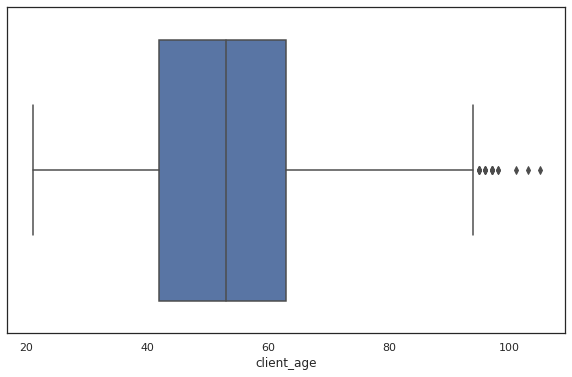

In [ ]:
sns.boxplot(df_client['client_age'])

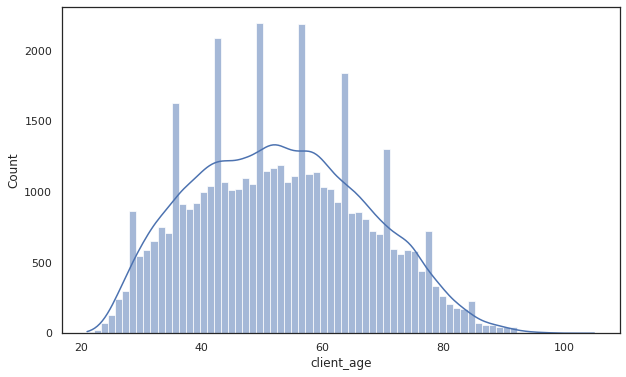

In [ ]:
sns.histplot(df_client['client_age'], kde='TRUE')

## Region wise Analysis

In [ ]:
df_dep_client = pd.merge(df_dep, df_client, on='client_id', how='inner')
df_dep_client.head(2)

,client_id,deposit_type,deposit_amount,deposit_cadence,date,month_name,client_geographical_region,client_residence_status,client_age
0,240341276372,Actual Deposit,440.0,Biweekly,2019-06-01,Month 1,West,Own,51
1,240341276372,Scheduled Deposit,440.0,Biweekly,2019-06-01,Month 1,West,Own,51


### Creating region wise table





In [ ]:
df_midwest = df_dep_client.where((df_dep_client['client_geographical_region'] == 'Midwest')).dropna()
df_northeast = df_dep_client.where((df_dep_client['client_geographical_region'] == 'Northeast')).dropna()
df_south = df_dep_client.where((df_dep_client['client_geographical_region'] == 'South')).dropna()
df_west = df_dep_client.where((df_dep_client['client_geographical_region'] == 'West')).dropna()

In [ ]:
df_midwest.head(5)

,client_id,deposit_type,deposit_amount,deposit_cadence,date,month_name,client_geographical_region,client_residence_status,client_age
368,1.877442e+13,Actual Deposit,456.0,Monthly,2019-06-01,Month 1,Midwest,Own,62.0
369,1.877442e+13,Scheduled Deposit,456.0,Monthly,2019-06-01,Month 1,Midwest,Own,62.0
370,1.877442e+13,Actual Deposit,456.0,Monthly,2019-07-01,Month 2,Midwest,Own,62.0
371,1.877442e+13,Scheduled Deposit,456.0,Monthly,2019-07-01,Month 2,Midwest,Own,62.0
372,1.877442e+13,Actual Deposit,456.0,Monthly,2019-08-01,Month 3,Midwest,Own,62.0


In [ ]:
df_mw1 = df_midwest.where(df_midwest['month_name'] == 'Month 1').dropna()
df_ne1 = df_northeast.where(df_northeast['month_name'] == 'Month 1').dropna()
df_s1 = df_south.where(df_south['month_name'] == 'Month 1').dropna()
df_w1 = df_west.where(df_west['month_name'] == 'Month 1').dropna()

In [ ]:
df_mw2 = df_midwest.where(df_midwest['month_name'] == 'Month 2').dropna()
df_ne2 = df_northeast.where(df_northeast['month_name'] == 'Month 2').dropna()
df_s2 = df_south.where(df_south['month_name'] == 'Month 2').dropna()
df_w2 = df_west.where(df_west['month_name'] == 'Month 2').dropna()

In [ ]:
df_mw3 = df_midwest.where(df_midwest['month_name'] == 'Month 3').dropna()
df_ne3 = df_northeast.where(df_northeast['month_name'] == 'Month 3').dropna()
df_s3 = df_south.where(df_south['month_name'] == 'Month 3').dropna()
df_w3 = df_west.where(df_west['month_name'] == 'Month 3').dropna()

In [ ]:
df_mw4 = df_midwest.where(df_midwest['month_name'] == 'Month 4').dropna()
df_ne4 = df_northeast.where(df_northeast['month_name'] == 'Month 4').dropna()
df_s4 = df_south.where(df_south['month_name'] == 'Month 4').dropna()
df_w4 = df_west.where(df_west['month_name'] == 'Month 4').dropna()

In [ ]:
df_mw5 = df_midwest.where(df_midwest['month_name'] == 'Month 5').dropna()
df_ne5 = df_northeast.where(df_northeast['month_name'] == 'Month 5').dropna()
df_s5 = df_south.where(df_south['month_name'] == 'Month 5').dropna()
df_w5 = df_west.where(df_west['month_name'] == 'Month 5').dropna()

In [ ]:
df_mw1.head(5)

In [ ]:
# cust_anal = {'Month': ['m2','m3','m4','m5'],
#               'Settled_accounts': [settled1, settled2, settled3, settled4],
#              'New customers': [addn1, addn2, addn3, addn4]}

# d_cust_anal = pd.DataFrame(cust_anal)
# d_cust_anal

In [ ]:
settled_accounts = {'Month': ['m1','m2','m3','m4'],
               'west': [settled_w1, settled_w2, settled_w3, settled_w4],
               'south': [settled_s1, settled_s2, settled_s3, settled_s4],
               'northeast': [settled_ne1, settled_ne2, settled_ne3, settled_ne4],
               'midwest': [settled_mw1, settled_mw2, settled_mw3, settled_mw4]}

df_settled_accounts = pd.DataFrame(settled_accounts)
df_settled_accounts

,Month,west,south,northeast,midwest
0,m1,1043,553,415,365
1,m2,617,273,162,199
2,m3,3443,1772,1296,1235
3,m4,1230,492,490,431


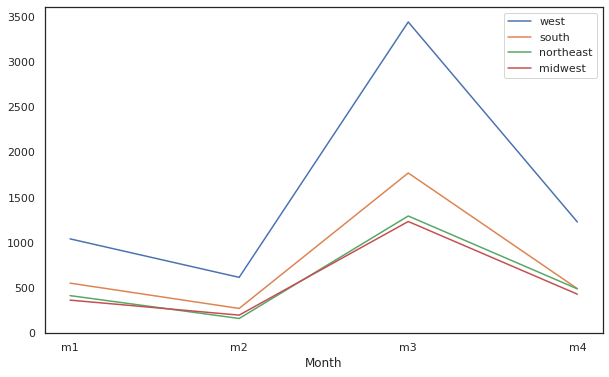

In [ ]:
ax = plt.gca()
  
#use plot() method on the dataframe
df_settled_accounts.plot( x = 'Month' , y = 'west', ax = ax )
df_settled_accounts.plot( x = 'Month' , y = 'south' , ax = ax )
df_settled_accounts.plot( x = 'Month' , y = 'northeast' , ax = ax )
df_settled_accounts.plot( x = 'Month' , y = 'midwest' , ax = ax )

In [ ]:
new_clients = {'Month': ['m1','m2','m3','m4'],
               'west': [addn_w1, addn_w2, addn_w3, addn_w5],
               'south': [addn_s1, addn_s2, addn_s3, addn_s5],
               'northeast': [addn_ne1, addn_ne2, addn_ne3, addn_ne5],
               'midwest': [addn_mw1, addn_mw2, addn_mw3, addn_mw5]}

new_clients = pd.DataFrame(new_clients)
new_clients

,Month,west,south,northeast,midwest
0,m1,1865,840,713,756
1,m2,12711,5881,4906,5169
2,m3,738,281,203,252
3,m4,882,399,342,315


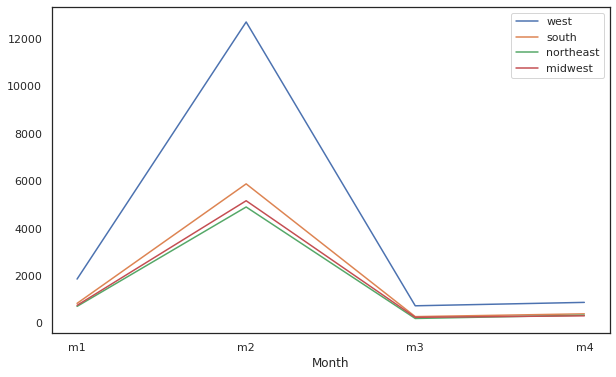

In [ ]:
ax = plt.gca()
  
#use plot() method on the dataframe
new_clients.plot( x = 'Month' , y = 'west', ax = ax )
new_clients.plot( x = 'Month' , y = 'south' , ax = ax )
new_clients.plot( x = 'Month' , y = 'northeast' , ax = ax )
new_clients.plot( x = 'Month' , y = 'midwest' , ax = ax )

### Month1 new clients

In [ ]:
q = """Select count(client_id)
        from addn1_c
        where client_id in (select client_id from df_w2)"""

addn_w1 = pysqldf(q)
addn_w1 = addn_w1['count(client_id)'][0]
addn_w1

1865

In [ ]:
q = """Select count(client_id)
        from addn1_c
        where client_id in (select client_id from df_s2)"""

addn_s1 = pysqldf(q)
addn_s1 = addn_s1['count(client_id)'][0]
addn_s1

840

In [ ]:
q = """Select count(client_id)
        from addn1_c
        where client_id in (select client_id from df_ne2)"""

addn_ne1 = pysqldf(q)
addn_ne1 = addn_ne1['count(client_id)'][0]
addn_ne1

713

In [ ]:
q = """Select count(client_id)
        from addn1_c
        where client_id in (select client_id from df_mw2)"""

addn_mw1 = pysqldf(q)
addn_mw1 = addn_mw1['count(client_id)'][0]
addn_mw1

756

### Month 2 New clients

In [ ]:
q = """Select count(client_id)
        from addn2_c
        where client_id in (select client_id from df_s3)"""

addn_s2 = pysqldf(q)
addn_s2 = addn_s2['count(client_id)'][0]
addn_s2

5881

In [ ]:
q = """Select count(client_id)
        from addn2_c
        where client_id in (select client_id from df_w3)"""

addn_w2 = pysqldf(q)
addn_w2 = addn_w2['count(client_id)'][0]
addn_w2

12711

In [ ]:
q = """Select count(client_id)
        from addn2_c
        where client_id in (select client_id from df_ne3)"""

addn_ne2 = pysqldf(q)
addn_ne2 = addn_ne2['count(client_id)'][0]
addn_ne2

4906

In [ ]:
q = """Select count(client_id)
        from addn2_c
        where client_id in (select client_id from df_mw3)"""

addn_mw2 = pysqldf(q)
addn_mw2 = addn_mw2['count(client_id)'][0]
addn_mw2

5169

### Month 3 New Cients

In [ ]:
q = """Select count(client_id)
        from addn3_c
        where client_id in (select client_id from df_w4)"""

addn_w3 = pysqldf(q)
addn_w3 = addn_w3['count(client_id)'][0]
addn_w3

738

In [ ]:
q = """Select count(client_id)
        from addn3_c
        where client_id in (select client_id from df_s4)"""

addn_s3 = pysqldf(q)
addn_s3 = addn_s3['count(client_id)'][0]
addn_s3

281

In [ ]:
q = """Select count(client_id)
        from addn3_c
        where client_id in (select client_id from df_ne4)"""

addn_ne3 = pysqldf(q)
addn_ne3 = addn_ne3['count(client_id)'][0]
addn_ne3

203

In [ ]:
q = """Select count(client_id)
        from addn3_c
        where client_id in (select client_id from df_mw4)"""

addn_mw3 = pysqldf(q)
addn_mw3 = addn_mw3['count(client_id)'][0]
addn_mw3

252

### Month 4 New Clients

In [ ]:
q = """Select count(client_id)
        from addn4_c
        where client_id in (select client_id from df_w5)"""

addn_w5 = pysqldf(q)
addn_w5 = addn_w5['count(client_id)'][0]
addn_w5

882

In [ ]:
q = """Select count(client_id)
        from addn4_c
        where client_id in (select client_id from df_s5)"""

addn_s5 = pysqldf(q)
addn_s5 = addn_s5['count(client_id)'][0]
addn_s5

399

In [ ]:
q = """Select count(client_id)
        from addn4_c
        where client_id in (select client_id from df_ne5)"""

addn_ne5 = pysqldf(q)
addn_ne5 = addn_ne5['count(client_id)'][0]
addn_ne5

342

In [ ]:
q = """Select count(client_id)
        from addn4_c
        where client_id in (select client_id from df_mw5)"""

addn_mw5 = pysqldf(q)
addn_mw5 = addn_mw5['count(client_id)'][0]
addn_mw5

315

### Month1 settled Accounts

In [ ]:
q = """Select count(client_id)
        from settled1_c
        where client_id in (select client_id from df_w1)"""

settled_w1 = pysqldf(q)
settled_w1 = settled_w1['count(client_id)'][0]
settled_w1

1043

In [ ]:
q = """Select count(client_id)
        from settled1_c
        where client_id in (select client_id from df_s1)"""

settled_s1 = pysqldf(q)
settled_s1 = settled_s1['count(client_id)'][0]
settled_s1

553

In [ ]:
q = """Select count(client_id)
        from settled1_c
        where client_id in (select client_id from df_ne1)"""

settled_ne1 = pysqldf(q)
settled_ne1 = settled_ne1['count(client_id)'][0]
settled_ne1

415

In [ ]:
q = """Select count(client_id)
        from settled1_c
        where client_id in (select client_id from df_mw1)"""

settled_mw1 = pysqldf(q)
settled_mw1 = settled_mw1['count(client_id)'][0]
settled_mw1

365

### Month2 settled accounts

In [ ]:
q = """Select count(client_id)
        from settled2_c
        where client_id in (select client_id from df_w2)"""

settled_w2 = pysqldf(q)
settled_w2 = settled_w2['count(client_id)'][0]
settled_w2

617

In [ ]:
q = """Select count(client_id)
        from settled2_c
        where client_id in (select client_id from df_s2)"""

settled_s2 = pysqldf(q)
settled_s2 = settled_s2['count(client_id)'][0]
settled_s2

273

In [ ]:
q = """Select count(client_id)
        from settled2_c
        where client_id in (select client_id from df_ne2)"""

settled_ne2 = pysqldf(q)
settled_ne2 = settled_ne2['count(client_id)'][0]
settled_ne2

162

In [ ]:
q = """Select count(client_id)
        from settled2_c
        where client_id in (select client_id from df_mw2)"""

settled_mw2 = pysqldf(q)
settled_mw2 = settled_mw2['count(client_id)'][0]
settled_mw2

199

### Month3 Settled accounts

In [ ]:
q = """Select count(client_id)
        from settled3_c
        where client_id in (select client_id from df_w3)"""

settled_w3 = pysqldf(q)
settled_w3 = settled_w3['count(client_id)'][0]
settled_w3

3443

In [ ]:
q = """Select count(client_id)
        from settled3_c
        where client_id in (select client_id from df_s3)"""

settled_s3 = pysqldf(q)
settled_s3 = settled_s3['count(client_id)'][0]
settled_s3

1772

In [ ]:
q = """Select count(client_id)
        from settled3_c
        where client_id in (select client_id from df_ne3)"""

settled_ne3 = pysqldf(q)
settled_ne3 = settled_ne3['count(client_id)'][0]
settled_ne3

1296

In [ ]:
q = """Select count(client_id)
        from settled3_c
        where client_id in (select client_id from df_mw3)"""

settled_mw3 = pysqldf(q)
settled_mw3 = settled_mw3['count(client_id)'][0]
settled_mw3

1235

### Month 4 Settled accounts

In [ ]:
q = """Select count(client_id)
        from settled4_c
        where client_id in (select client_id from df_w4)"""

settled_w4 = pysqldf(q)
settled_w4 = settled_w4['count(client_id)'][0]
settled_w4

1230

In [ ]:
q = """Select count(client_id)
        from settled4_c
        where client_id in (select client_id from df_s4)"""

settled_s4 = pysqldf(q)
settled_s4 = settled_s4['count(client_id)'][0]
settled_s4

492

In [ ]:
q = """Select count(client_id)
        from settled4_c
        where client_id in (select client_id from df_ne4)"""

settled_ne4 = pysqldf(q)
settled_ne4 = settled_ne4['count(client_id)'][0]
settled_ne4

490

In [ ]:
q = """Select count(client_id)
        from settled4_c
        where client_id in (select client_id from df_mw4)"""

settled_mw4 = pysqldf(q)
settled_mw4 = settled_mw4['count(client_id)'][0]
settled_mw4

431

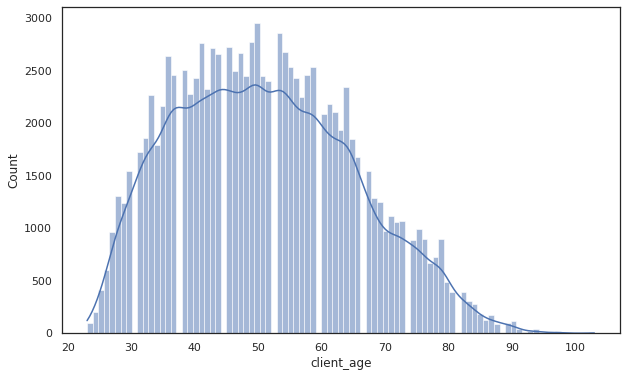

In [ ]:
sns.histplot(df_south['client_age'], kde='TRUE')

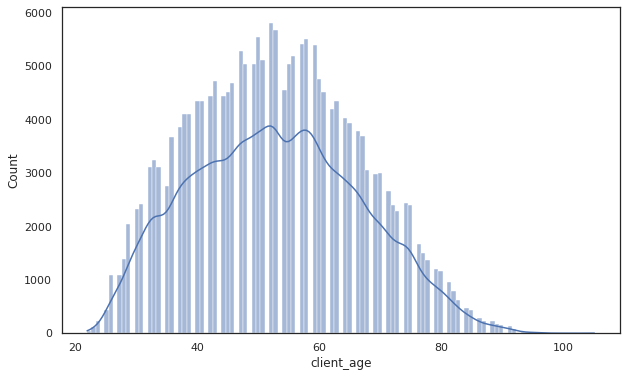

In [ ]:
sns.histplot(df_west['client_age'], kde='TRUE')

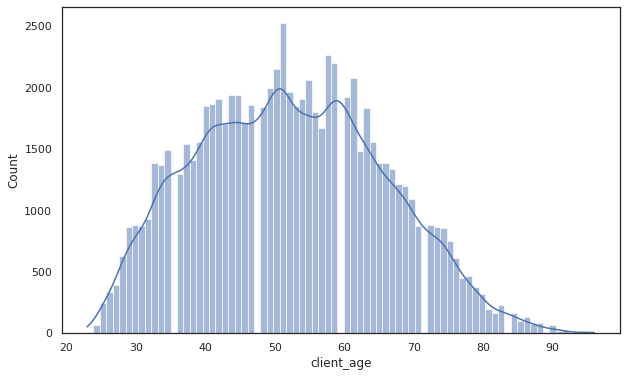

In [ ]:
sns.histplot(df_northeast['client_age'], kde='TRUE')

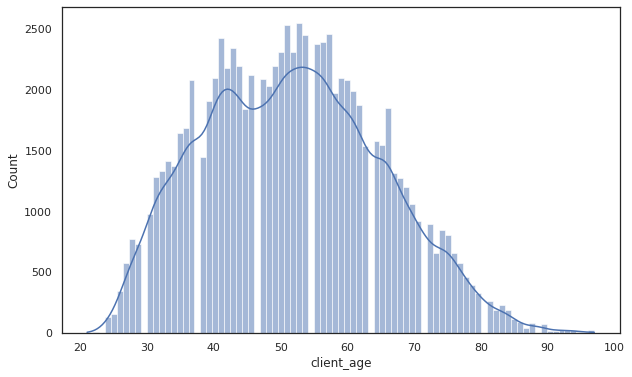

In [ ]:
sns.histplot(df_midwest['client_age'], kde='TRUE')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


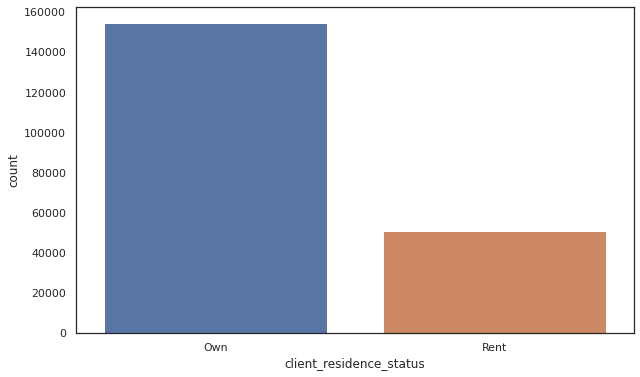

In [ ]:
res_w = sns.countplot(df_west['client_residence_status'])
res_w

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


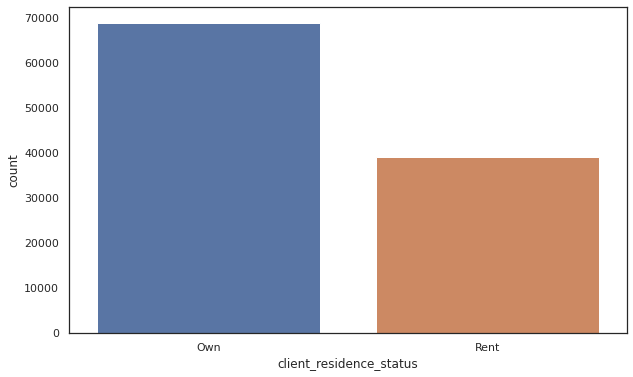

In [ ]:
res_s = sns.countplot(df_south['client_residence_status'])
res_s

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


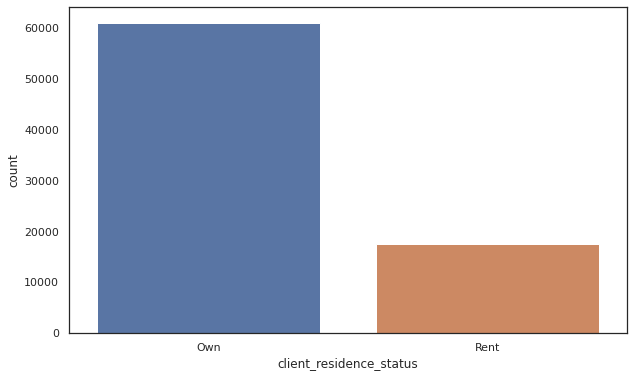

In [ ]:
res_ne = sns.countplot(df_northeast['client_residence_status'])
res_ne

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


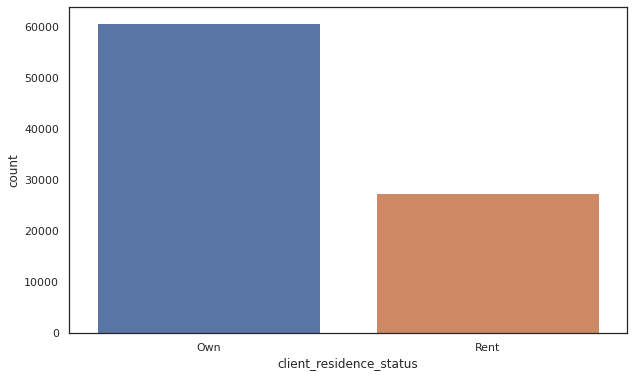

In [ ]:
res_mw = sns.countplot(df_midwest['client_residence_status'])

In [ ]:
bc_client = df_dep_client.where((df_dep_client['month_name'] == 'Month 1') | (df_dep_client['month_name'] == 'Month 2')).dropna()
bc_client_rgn = bc_client[['client_id','client_geographical_region']].drop_duplicates()

In [ ]:
q = """select client_geographical_region, count(distinct client_id) as before_campaign
       from bc_client_rgn
       group by client_geographical_region"""

b_client_rgn = pysqldf(q)
b_client_rgn

,client_geographical_region,before_campaign
0,Midwest,6004
1,Northeast,5372
2,South,7976
3,West,14699


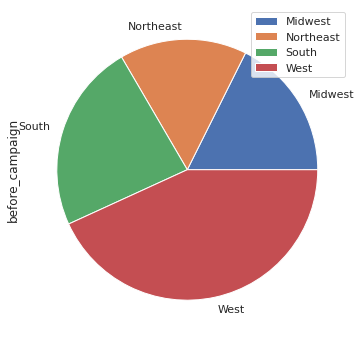

In [ ]:
b_client_rgn.groupby(['client_geographical_region']).sum().plot(kind='pie', y='before_campaign')

In [ ]:
ac_client = df_dep_client.where((df_dep_client['month_name'] == 'Month 3') | (df_dep_client['month_name'] == 'Month 4') | (df_dep_client['month_name'] == 'Month 5')).dropna()
ac_client_rgn = ac_client[['client_id', 'client_geographical_region']].drop_duplicates()

In [ ]:
q = """select client_geographical_region, count(distinct client_id) as after_campaign
       from ac_client_rgn
       group by client_geographical_region"""

a_client_rgn = pysqldf(q)
a_client_rgn

,client_geographical_region,after_campaign
0,Midwest,7903
1,Northeast,7132
2,South,10170
3,West,19515


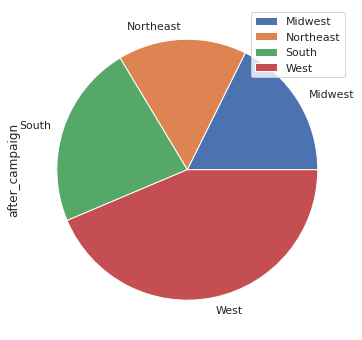

In [ ]:
a_client_rgn.groupby(['client_geographical_region']).sum().plot(kind='pie', y='after_campaign')

In [ ]:
q = """select bc.client_geographical_region, before_campaign, after_campaign, ((after_campaign-before_campaign)*100/before_campaign) as perc_incr
       from a_client_rgn ac
       join b_client_rgn bc
       on ac.client_geographical_region = bc.client_geographical_region"""

client_rgn = pysqldf(q)
client_rgn

,client_geographical_region,before_campaign,after_campaign,perc_incr
0,Midwest,6004,7903,31
1,Northeast,5372,7132,32
2,South,7976,10170,27
3,West,14699,19515,32
